In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv(r'D:\kathan\python_codes\7th sem\ML lab\household_power_consumption.txt',  sep=';', na_values='?')

data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [18]:
# Convert necessary columns to numeric (float), forcing non-convertible values to NaN
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

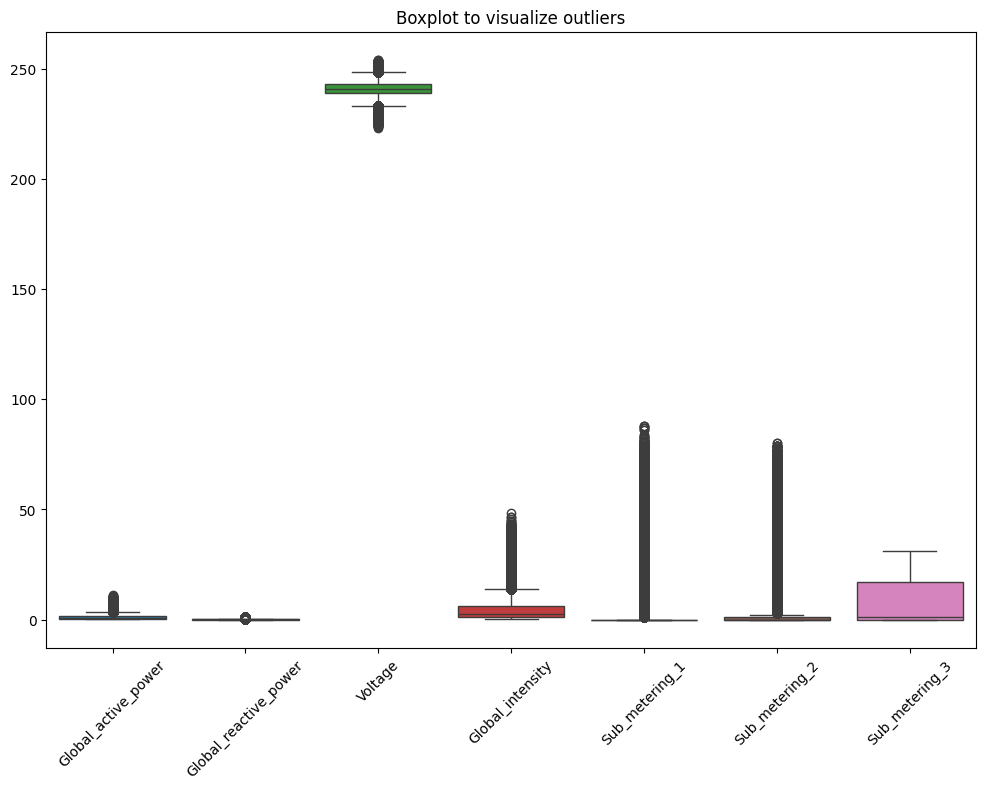

In [22]:
# Drop missing values in those columns
data_clean = data[numeric_cols].dropna()

numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

plt.figure(figsize=(12,8))
sns.boxplot(data)
plt.title('Boxplot to visualize outliers')
plt.xticks(rotation=45)
plt.show()

In [28]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])

dec_2006 = data[(data['Date']>= '2006-12-01')& (data['Date'] <= '2006-12-31')]
nov_2009 = data[(data['Date'] >= '2009-11-01') & (data['Date'] <= '2009-11-30')]
print(f'Dec 2006: {dec_2006.shape}, Nov 2009: {nov_2009.shape}')


Dec 2006: (21996, 9), Nov 2009: (43200, 9)


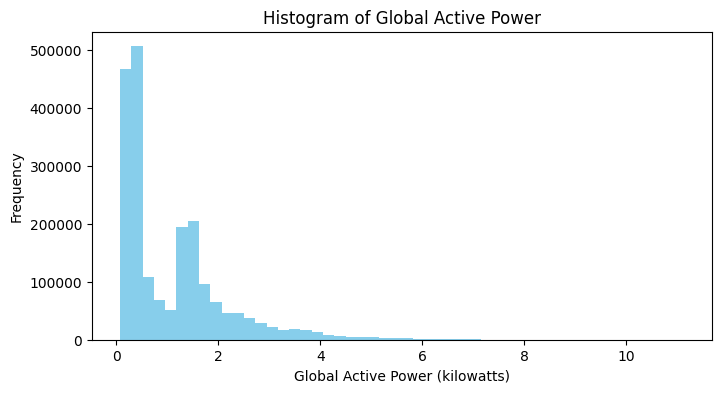

In [29]:
plt.figure(figsize=(8, 4))
plt.hist(data['Global_active_power'].dropna(), bins=50, color='skyblue')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.title('Histogram of Global Active Power')
plt.show()


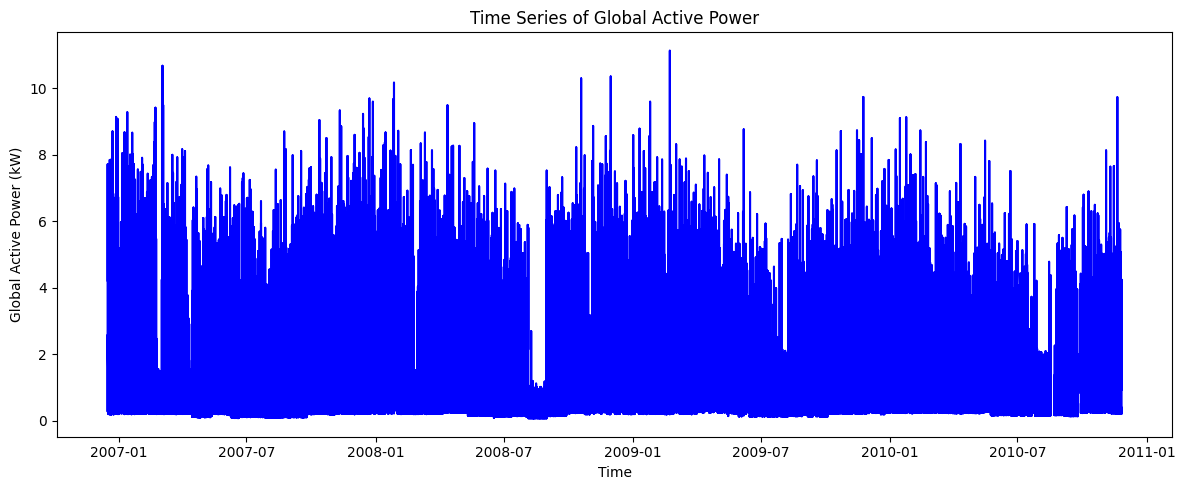

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Global_active_power'], color='blue')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Time Series of Global Active Power')
plt.tight_layout()
plt.show()


C:\Users\Kathan Vyas\AppData\Local\Temp\ipykernel_11084\4116785751.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Kathan Vyas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


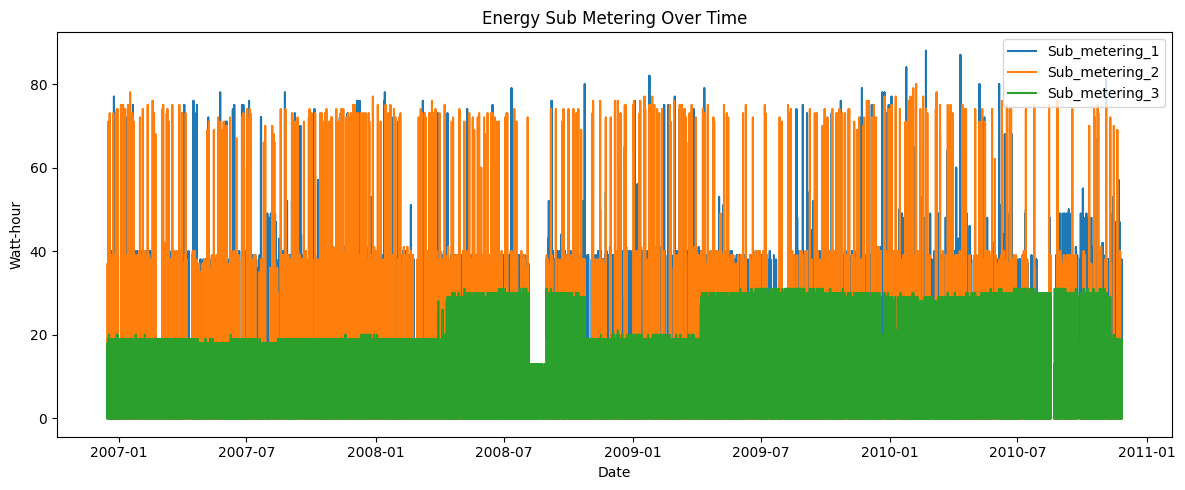

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Sub_metering_1'], label='Sub_metering_1')
plt.plot(data['Date'], data['Sub_metering_2'], label='Sub_metering_2')
plt.plot(data['Date'], data['Sub_metering_3'], label='Sub_metering_3')
plt.legend()
plt.title('Energy Sub Metering Over Time')
plt.xlabel('Date')
plt.ylabel('Watt-hour')
plt.tight_layout()
plt.show()


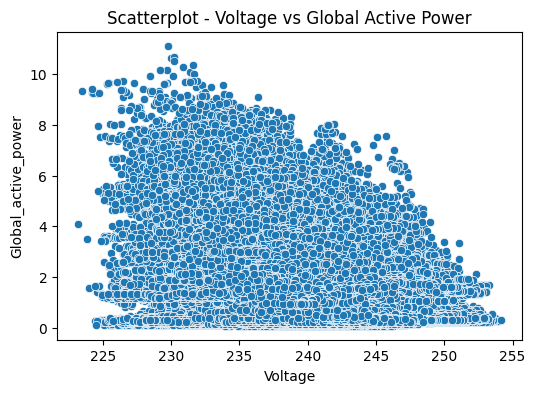

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Voltage', y='Global_active_power', data=data)
plt.title('Scatterplot - Voltage vs Global Active Power')
plt.show()


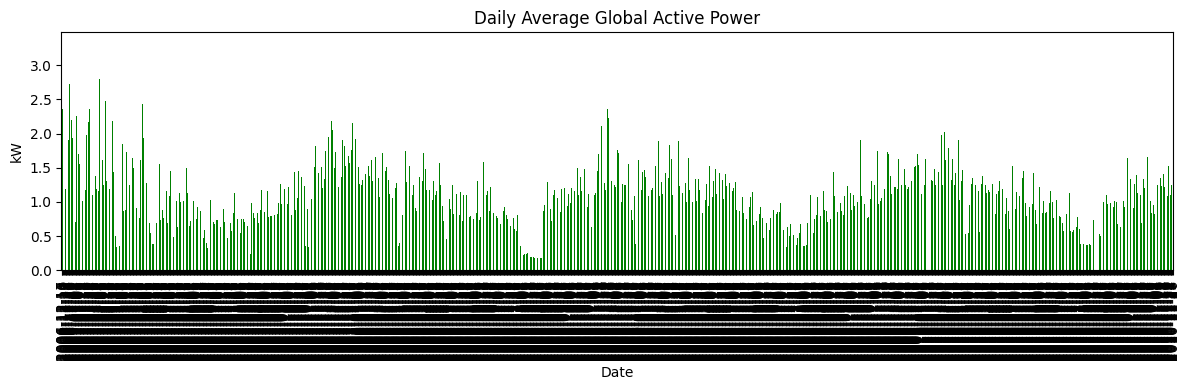

In [34]:
data['Date'] = data['Date'].dt.date
daily_avg = data.groupby('Date')['Global_active_power'].mean()

plt.figure(figsize=(12, 4))
daily_avg.plot(kind='bar', color='green')
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('kW')
plt.tight_layout()
plt.show()


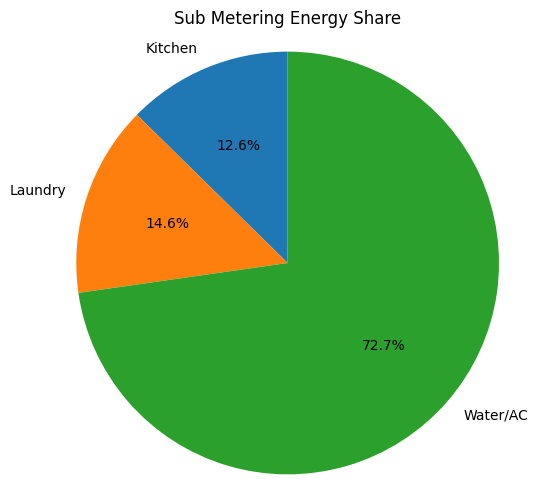

In [35]:
sub_meter_total = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
labels = ['Kitchen', 'Laundry', 'Water/AC']
plt.figure(figsize=(6, 6))
plt.pie(sub_meter_total, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sub Metering Energy Share')
plt.axis('equal')
plt.show()


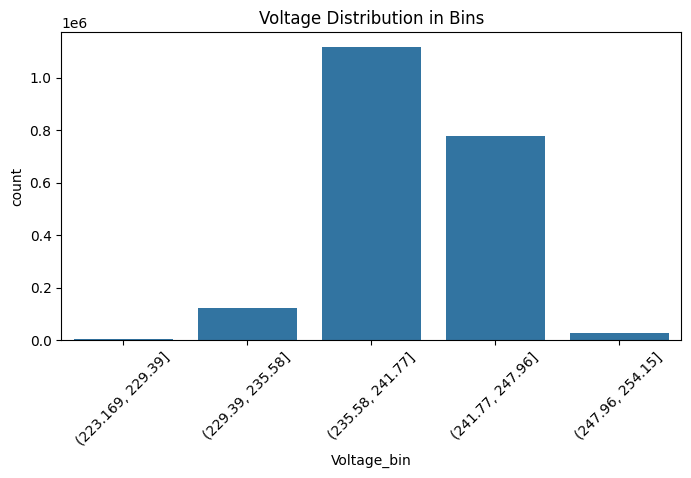

In [36]:
data['Voltage_bin'] = pd.cut(data['Voltage'], bins=5)
plt.figure(figsize=(8, 4))
sns.countplot(x='Voltage_bin', data=data)
plt.xticks(rotation=45)
plt.title('Voltage Distribution in Bins')
plt.show()


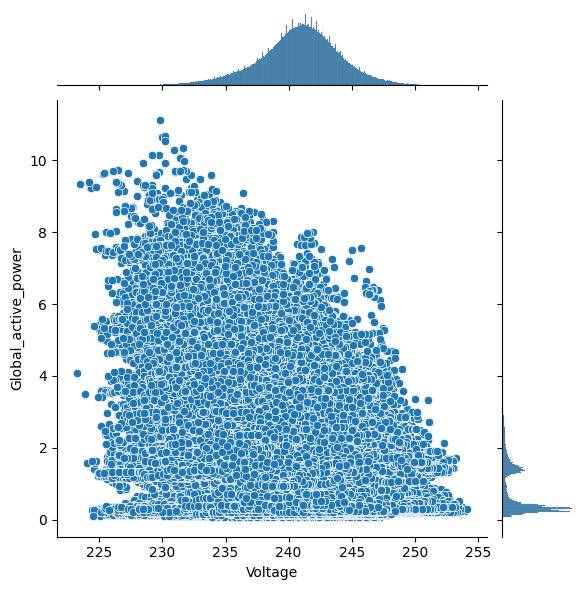

In [39]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data,)
plt.show()


